##### CTBA M3 Time Series Decomposition Assignment -- Cait Smith

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import strptime

%matplotlib inline

In [255]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [256]:
#redesignate columns to remove "-" and spaces
df = df.rename(columns={"Month-Year": "Date", "Total Construction": "Total", "Private Construction":"Private", "Public Construction":"Public"})

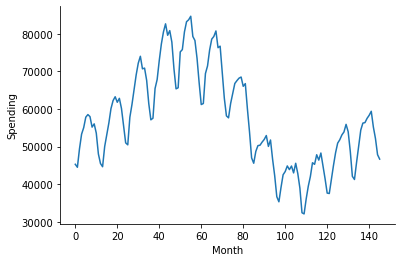

In [257]:
#now I plot private spending in order to identify trends, patterns, or 
#points of interest in the data before regressing it (will do public later in assignment)

fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private Spending on Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [258]:
#must change format of month from name to numerical representation
df.Date = [datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in df.Date]

df



,Month,Date,Total,Private,Public
0,1,01-2002,59516,45273,14243
1,2,02-2002,58588,44475,14113
2,3,03-2002,63782,49396,14386
3,4,04-2002,69504,53283,16221
4,5,05-2002,73384,55009,18375
...,...,...,...,...,...
141,142,10-2013,85193,59370,25823
142,143,11-2013,77931,55191,22741
143,144,12-2013,71502,52132,19369
144,145,01-2014,64661,47827,16834


In [259]:

#and reformat date a smidge more
df.Date = [datetime.datetime.strptime(x,'%m-%Y').strftime('%Y-%m') for x in df.Date]

df

,Month,Date,Total,Private,Public
0,1,2002-01,59516,45273,14243
1,2,2002-02,58588,44475,14113
2,3,2002-03,63782,49396,14386
3,4,2002-04,69504,53283,16221
4,5,2002-05,73384,55009,18375
...,...,...,...,...,...
141,142,2013-10,85193,59370,25823
142,143,2013-11,77931,55191,22741
143,144,2013-12,71502,52132,19369
144,145,2014-01,64661,47827,16834


In [260]:
df.Date = pd.DatetimeIndex(df.Date)
df

,Month,Date,Total,Private,Public
0,1,2002-01-01,59516,45273,14243
1,2,2002-02-01,58588,44475,14113
2,3,2002-03-01,63782,49396,14386
3,4,2002-04-01,69504,53283,16221
4,5,2002-05-01,73384,55009,18375
...,...,...,...,...,...
141,142,2013-10-01,85193,59370,25823
142,143,2013-11-01,77931,55191,22741
143,144,2013-12-01,71502,52132,19369
144,145,2014-01-01,64661,47827,16834


Average Squared Error per Month:  37395667.05489795
     Month       Date  Total  Private  Public        MovAvg         sqErr
18      19 2003-07-01  82971    62216   20755  57969.430556  1.803335e+07
19      20 2003-08-01  85191    63234   21957  58314.944444  2.419711e+07
20      21 2003-09-01  83841    61767   22075  58718.902778  9.290897e+06
21      22 2003-10-01  83133    62813   20321  59143.555556  1.346482e+07
22      23 2003-11-01  77915    60115   17801  59593.541667  2.719188e+05
..     ...        ...    ...      ...     ...           ...           ...
123    124 2012-04-01  66223    44964   21259  46543.069444  2.493460e+06
124    125 2012-05-01  72240    48342   23898  46907.194444  2.058667e+06
125    126 2012-06-01  77876    50900   26975  47262.611111  1.323060e+07
126    127 2012-07-01  78897    51794   27104  47660.583333  1.708513e+07
127    128 2012-08-01  81712    53073   28640  48077.638889  2.495363e+07

[110 rows x 7 columns]


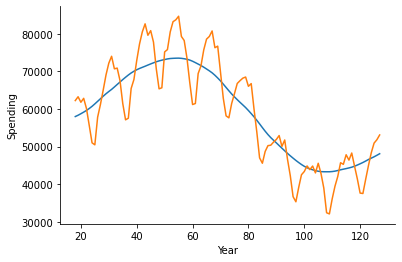

In [261]:
def sqErr(row):
    return (row['Private'] - row['MovAvg'])**2

df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN

window = 36
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Private'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private'].sum() + 0.5*df.iloc[i + int(window/2)]['Private'])/float(window)

df['sqErr'] = (df['Private'] - df['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Private'],label='Private Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErr'])/len(df))
print(df)

In [262]:
df['R1'] = df['Private'] - df['MovAvg']
df['R1Error'] = abs((df['Private'] - df['R1'])/df['Private'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Date,Total,Private,Public,MovAvg,sqErr,R1,R1Error
18,19,2003-07-01 00:00:00,82971,62216,20755,57969.4,"18,033,352.0","4,246.6",0.932
19,20,2003-08-01 00:00:00,85191,63234,21957,58314.9,"24,197,107.6","4,919.1",0.922
20,21,2003-09-01 00:00:00,83841,61767,22075,58718.9,"9,290,896.7","3,048.1",0.951
21,22,2003-10-01 00:00:00,83133,62813,20321,59143.6,"13,464,822.5","3,669.4",0.942
22,23,2003-11-01 00:00:00,77915,60115,17801,59593.5,"271,918.8",521.5,0.991
23,24,2003-12-01 00:00:00,71050,55584,15466,60111.7,"20,500,394.3","-4,527.7",1.081
24,25,2004-01-01 00:00:00,64934,50975,13959,60687.3,"94,329,418.8","-9,712.3",1.191
25,26,2004-02-01 00:00:00,64138,50449,13689,61335.4,"118,514,067.8","-10,886.4",1.216
26,27,2004-03-01 00:00:00,73238,57796,15443,62017.4,"17,820,241.4","-4,221.4",1.073
27,28,2004-04-01 00:00:00,78354,61177,17177,62701.1,"2,322,787.7","-1,524.1",1.025


In [263]:
df['R1'] = df['Private'] - df['MovAvg']
df['R1Error'] = abs((df['Private'] - df['R1'])/df['Private'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

df

,Month,Date,Total,Private,Public,MovAvg,sqErr,R1,R1Error
18,19,2003-07-01,82971,62216,20755,57969.430556,1.803335e+07,4246.569444,0.931745
19,20,2003-08-01,85191,63234,21957,58314.944444,2.419711e+07,4919.055556,0.922209
20,21,2003-09-01,83841,61767,22075,58718.902778,9.290897e+06,3048.097222,0.950652
21,22,2003-10-01,83133,62813,20321,59143.555556,1.346482e+07,3669.444444,0.941581
22,23,2003-11-01,77915,60115,17801,59593.541667,2.719188e+05,521.458333,0.991326
...,...,...,...,...,...,...,...,...,...
123,124,2012-04-01,66223,44964,21259,46543.069444,2.493460e+06,-1579.069444,1.035119
124,125,2012-05-01,72240,48342,23898,46907.194444,2.058667e+06,1434.805556,0.970320
125,126,2012-06-01,77876,50900,26975,47262.611111,1.323060e+07,3637.388889,0.928539
126,127,2012-07-01,78897,51794,27104,47660.583333,1.708513e+07,4133.416667,0.920195


Average Residual:  113.25315656565621


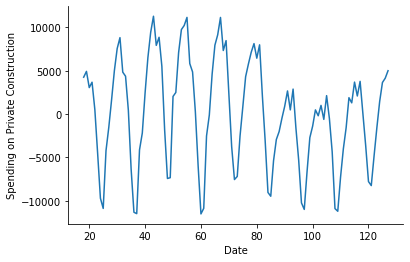

In [264]:
fig,ax = plt.subplots()
ax.plot(df['R1'])
ax.set_xlabel('Date')
ax.set_ylabel('Spending on Private Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R1'])/len(df))

In [265]:
maxCorr = 0.0
period = np.NaN
for i in range(1,111):
    corr = df['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8250475036301714
Correlation, lag  2     0.48209397522214487
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.2931058225915468
Correlation, lag  5     -0.5386625150984726
Correlation, lag  6     -0.6496282831082483
Correlation, lag  7     -0.5498384774755181
Correlation, lag  8     -0.31854138317316116
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.4117695258428451
Correlation, lag  11     0.7322731003955263
Correlation, lag  12     0.8944851710984217
Correlation, lag  13     0.7299213692607464
Correlation, lag  14     0.4055214152186814
Correlation, lag  15     0.003123797466748183
Correlation, lag  16     -0.34159925855108375
Correlation, lag  17     -0.5745510163732713
Correlation, lag  18     -0.681216824190257
Correlation, lag  19     -0.5902172854543252
Correlation, lag  20     -0.37531995989940636
Correlation, lag  21     -0.0475038842275472
Correlation, lag  22     0.3369494305895756
Correlation, lag  23    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


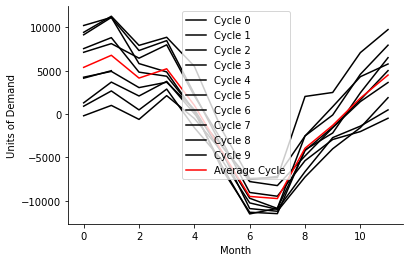

In [266]:
period = 12 #12 months in a year, each year is a cycle and b/c every twelfth entry in the series shows high correlation
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

This shows the nature of the annual cycle for private construction spending. Each cycle is 12 months (1 year) and the data encompasses 9 cycles. This shows that each cycle has high and low periods expected at the same point annually.

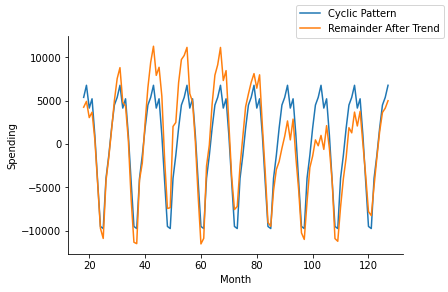

In [267]:
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
df['C'] = np.NaN   
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % 12] 

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern')
ax.plot(df['R1'],label='Remainder After Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

This graph demonstrates that the annual cycle is predictable, though the volume of spending varies (over or under).

Average Error:  0.037815969902102356
     Month       Date  Total  Private  Public        MovAvg           R1  \
18      19 2003-07-01  82971    62216   20755  57969.430556  4246.569444   
19      20 2003-08-01  85191    63234   21957  58314.944444  4919.055556   
20      21 2003-09-01  83841    61767   22075  58718.902778  3048.097222   
21      22 2003-10-01  83133    62813   20321  59143.555556  3669.444444   
22      23 2003-11-01  77915    60115   17801  59593.541667   521.458333   
..     ...        ...    ...      ...     ...           ...          ...   
123    124 2012-04-01  66223    44964   21259  46543.069444 -1579.069444   
124    125 2012-05-01  72240    48342   23898  46907.194444  1434.805556   
125    126 2012-06-01  77876    50900   26975  47262.611111  3637.388889   
126    127 2012-07-01  78897    51794   27104  47660.583333  4133.416667   
127    128 2012-08-01  81712    53073   28640  48077.638889  4995.361111   

      R1Error            C    R2Private          a

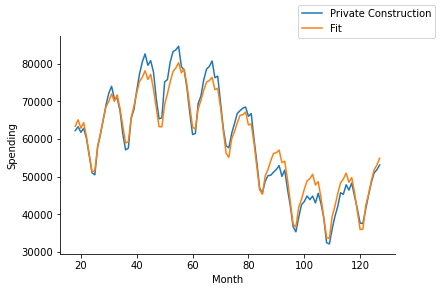

In [277]:
df['R2Private'] = df['R1'] - df['C']
df['R2ErrorPrivate'] = abs(df['R2Private']/df['Private'])
df['fit'] = df['MovAvg'] + df['C']
df.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2ErrorPrivate'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private Construction')
ax.plot(df['fit'], label = 'Fit')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     0.9027847832948317
Correlation, lag  2     0.7955702460094588
Correlation, lag  3     0.656056473535004
Correlation, lag  4     0.5316739965331644
Correlation, lag  5     0.402164136311839
Correlation, lag  6     0.329526746564048
Correlation, lag  7     0.3058519648433604
Correlation, lag  8     0.3307409862826249
Correlation, lag  9     0.3513528536369925
Correlation, lag  10     0.3919713070806424
Correlation, lag  11     0.4215207979561661
Correlation, lag  12     0.45317295658989837
Correlation, lag  13     0.3996822455232644
Correlation, lag  14     0.35553340791809873
Correlation, lag  15     0.26091897894154475
Correlation, lag  16     0.19032184469495012
Correlation, lag  17     0.12087743508505212
Correlation, lag  18     0.09559969424180804
Correlation, lag  19     0.09972184559354912
Correlation, lag  20     0.11683883938478473
Correlation, lag  21     0.12449790662917447
Correlation, lag  22     0.13251967578496213
Correlation, lag  23     0.1344962

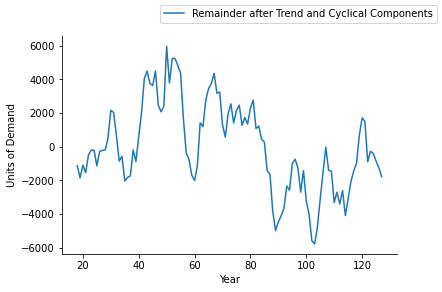

In [278]:
fig,ax = plt.subplots()
ax.plot(df['R2Private'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

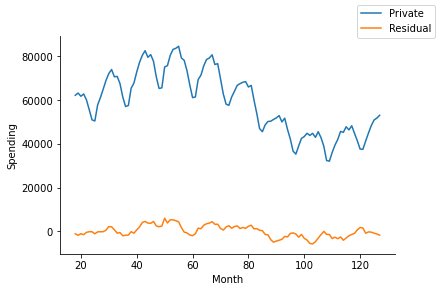

In [279]:
fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private')
#ax.plot(df['fit'],label='Fit')
ax.plot(df['R2Private'],label='Residual')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Residual measures how far off the average or expected spending actual spending was. This graph shows us that the residual is not as reliably cyclical as private spending is.

In [280]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df['sqErr']))


Squared Error for a = 0.1 : 3474835029.9367394
Squared Error for a = 0.2 : 2903377036.055973
Squared Error for a = 0.3 : 2399149394.396475
Squared Error for a = 0.4 : 1962152104.958241
Squared Error for a = 0.5 : 1592385167.741274
Squared Error for a = 0.6 : 1289848582.745575
Squared Error for a = 0.7 : 1054542349.9711412
Squared Error for a = 0.8 : 886466469.417975
Squared Error for a = 0.9 : 785620941.0860746
Squared Error for a = 1.0 : 752005764.9754412
Squared Error for a = 1.1 : 785620941.0860747
Squared Error for a = 1.2 : 886466469.417975
Squared Error for a = 1.3 : 1054542349.9711417
Squared Error for a = 1.4 : 1289848582.7455754
Squared Error for a = 1.5 : 1592385167.7412746
Squared Error for a = 1.6 : 1962152104.9582412
Squared Error for a = 1.7 : 2399149394.3964753
Squared Error for a = 1.8 : 2903377036.0559735
Squared Error for a = 1.9 : 3474835029.936742
Squared Error for a = 2.0 : 4113523376.0387745
Squared Error for a = 2.1 : 4819442074.362076
Squared Error for a = 2.2 :

In [282]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Average Error: ', sum(df['R2ErrorPrivate'])/len(df))

Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
Average Error:  0.037815969902102356
A

### Moving on to the same analysis, but for public spending

In [301]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [303]:
df = df.rename(columns={"Month-Year": "Date", "Total Construction": "Total", "Private Construction":"Private", "Public Construction":"Public"})

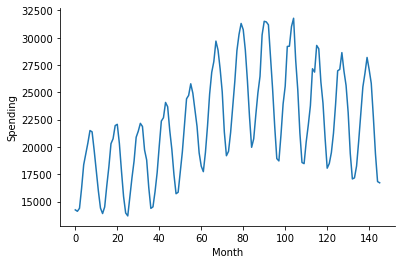

In [304]:
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public Spending on Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Overall public spending on construction is also cyclical, but the total spending is a lower dollar total than in private construction. 

Average Squared Error per Month:  1559106496.877264
     Month    Date  Total  Private  Public        MovAvg         sqErr
18      19  Jul-03  82971    62216   20755  18050.486111  1.950593e+09
19      20  Aug-03  85191    63234   21957  18058.000000  2.040871e+09
20      21  Sep-03  83841    61767   22075  18084.916667  1.908124e+09
21      22  Oct-03  83133    62813   20321  18126.152778  1.996914e+09
22      23  Nov-03  77915    60115   17801  18170.000000  1.759383e+09
..     ...     ...    ...      ...     ...           ...           ...
123    124  Apr-12  66223    44964   21259  23397.138889  4.651295e+08
124    125  May-12  72240    48342   23898  23333.500000  6.254251e+08
125    126  Jun-12  77876    50900   26975  23272.680556  7.632688e+08
126    127  Jul-12  78897    51794   27104  23222.000000  8.163592e+08
127    128  Aug-12  81712    53073   28640  23173.416667  8.939851e+08

[110 rows x 7 columns]


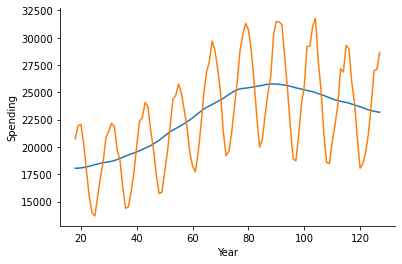

In [305]:
def sqErr(row):
    return (row['Public'] - row['MovAvg'])**2

df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN

window = 36
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Public'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Public'].sum() + 0.5*df.iloc[i + int(window/2)]['Public'])/float(window)

df['sqErr'] = (df['Private'] - df['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Public'],label='Public Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErr'])/len(df))
print(df)

In [319]:
df['R1'] = df['Public'] - df['MovAvg']
df['R1Error'] = abs((df['Public'] - df['R1'])/df['Public'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Date,Total,Private,Public,MovAvg,R1,R1Error,C,R2,R2ErrorPublic,fit,R2Public
18,19,Jul-03,82971,62216,20755,18050.5,"2,704.5",0.870,3690.790278,-986.276389,0.047520,21741.276389,-986.276389
19,20,Aug-03,85191,63234,21957,18058.0,"3,899.0",0.822,4961.773611,-1062.773611,0.048402,23019.773611,-1062.773611
20,21,Sep-03,83841,61767,22075,18084.9,"3,990.1",0.819,4573.222222,-583.138889,0.026416,22658.138889,-583.138889
21,22,Oct-03,83133,62813,20321,18126.2,"2,194.8",0.892,2192.078704,2.768519,0.000136,20318.231481,2.768519
22,23,Nov-03,77915,60115,17801,18170.0,-369.0,1.021,16.300926,-385.300926,0.021645,18186.300926,-385.300926
23,24,Dec-03,71050,55584,15466,18235.5,"-2,769.5",1.179,-3046.260802,276.760802,0.017895,15189.239198,276.760802
24,25,Jan-04,64934,50975,13959,18309.2,"-4,350.2",1.312,-5302.223765,952.057099,0.068204,13006.942901,952.057099
25,26,Feb-04,64138,50449,13689,18377.0,"-4,688.0",1.342,-5274.195988,586.237654,0.042825,13102.762346,586.237654
26,27,Mar-04,73238,57796,15443,18444.6,"-3,001.6",1.194,-3545.898148,544.287037,0.035245,14898.712963,544.287037
27,28,Apr-04,78354,61177,17177,18502.0,"-1,325.0",1.077,-1572.459877,247.459877,0.014406,16929.540123,247.459877


Average Residual:  120.58522727272724


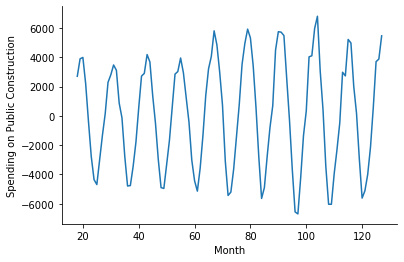

In [320]:
fig,ax = plt.subplots()
ax.plot(df['R1'])
ax.set_xlabel('Month')
ax.set_ylabel('Spending on Public Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R1'])/len(df))

These residuals are noteworthy as they dip even below 0, indicating a loss or businesses going "into the red" on spending.

In [321]:
maxCorr = 0.0
period = np.NaN
for i in range(1,111):
    corr = df['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8486375316894602
Correlation, lag  2     0.48461953375671823
Correlation, lag  3     -0.007177248780703138
Correlation, lag  4     -0.49554892375973464
Correlation, lag  5     -0.8288179569669595
Correlation, lag  6     -0.9462777407123569
Correlation, lag  7     -0.8288579638039721
Correlation, lag  8     -0.4857106197001034
Correlation, lag  9     0.004997098591155973
Correlation, lag  10     0.48176461969689494
Correlation, lag  11     0.8389178942275626
Correlation, lag  12     0.9802446550357115
Correlation, lag  13     0.8361843883266434
Correlation, lag  14     0.4848265284305895
Correlation, lag  15     -0.003592213269114509
Correlation, lag  16     -0.482223367018504
Correlation, lag  17     -0.8171150144686052
Correlation, lag  18     -0.9427534781166457
Correlation, lag  19     -0.833705190640071
Correlation, lag  20     -0.4961430024835646
Correlation, lag  21     -0.00985844797811757
Correlation, lag  22     0.4684416329134112
Correlation, lag  23

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


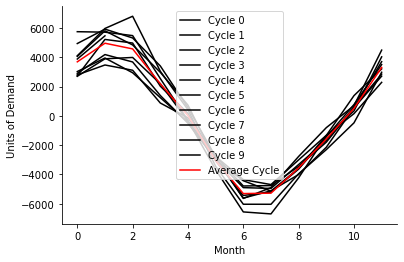

In [322]:
period = 12 #12 months in a year, each year is a cycle & high correlation every twelfth instance
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

This follows the trend we saw in private construction spending with high and low points occuring at the same point in the cycle, but at different volumes annually. 

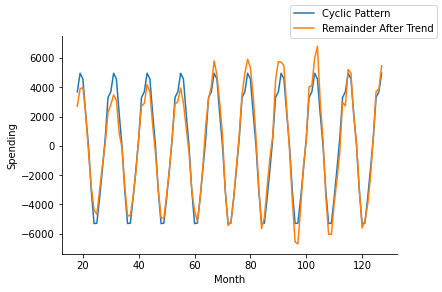

In [323]:
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
df['C'] = np.NaN   
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % 12] 

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern')
ax.plot(df['R1'],label='Remainder After Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.024999478035219624
     Month    Date  Total  Private  Public        MovAvg           R1  \
18      19  Jul-03  82971    62216   20755  18050.486111  2704.513889   
19      20  Aug-03  85191    63234   21957  18058.000000  3899.000000   
20      21  Sep-03  83841    61767   22075  18084.916667  3990.083333   
21      22  Oct-03  83133    62813   20321  18126.152778  2194.847222   
22      23  Nov-03  77915    60115   17801  18170.000000  -369.000000   
..     ...     ...    ...      ...     ...           ...          ...   
123    124  Apr-12  66223    44964   21259  23397.138889 -2138.138889   
124    125  May-12  72240    48342   23898  23333.500000   564.500000   
125    126  Jun-12  77876    50900   26975  23272.680556  3702.319444   
126    127  Jul-12  78897    51794   27104  23222.000000  3882.000000   
127    128  Aug-12  81712    53073   28640  23173.416667  5466.583333   

      R1Error            C           R2  R2ErrorPublic           fit  \
18   0.869693 

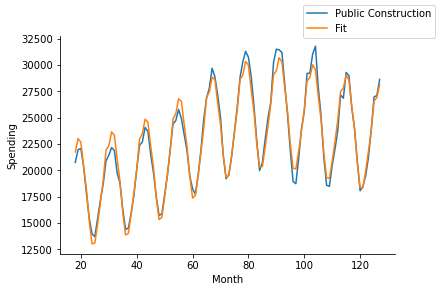

In [325]:
df['R2Public'] = df['R1'] - df['C']
df['R2ErrorPublic'] = abs(df['R2']/df['Public'])
df['fit'] = df['MovAvg'] + df['C']
#df.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2ErrorPublic'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public Construction')
ax.plot(df['fit'], label = 'Fit')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The data and graph above are expected based on previous analysis and are an even closer fit than we saw with private spending.

Correlation, lag  1     0.7155376451059174
Correlation, lag  2     0.4685225310660403
Correlation, lag  3     0.25515329726845276
Correlation, lag  4     -0.047012653343082585
Correlation, lag  5     -0.22016658790924404
Correlation, lag  6     -0.3132037721816346
Correlation, lag  7     -0.36128568452449933
Correlation, lag  8     -0.2437315599602842
Correlation, lag  9     0.013438618980204578
Correlation, lag  10     0.15965347522586715
Correlation, lag  11     0.38319034802866914
Correlation, lag  12     0.49428131134552283
Correlation, lag  13     0.40155433656190564
Correlation, lag  14     0.4013822541976086
Correlation, lag  15     0.2147075593569967
Correlation, lag  16     0.022139407727465962
Correlation, lag  17     -0.06500065931091233
Correlation, lag  18     -0.17184421045579074
Correlation, lag  19     -0.21271212196110678
Correlation, lag  20     -0.1185985728918552
Correlation, lag  21     -0.05056769990615314
Correlation, lag  22     0.018257128661801608
Correlation,

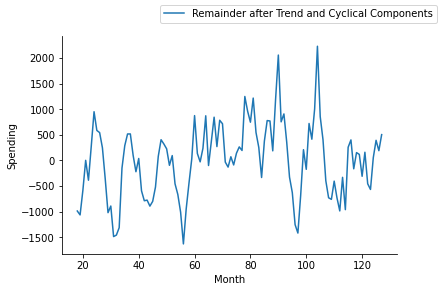

In [326]:
fig,ax = plt.subplots()
ax.plot(df['R2Public'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

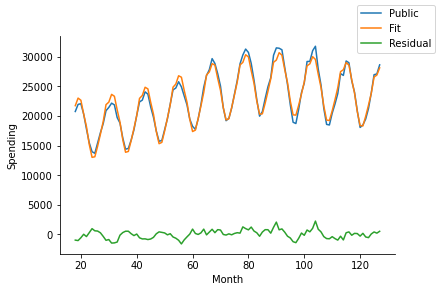

In [327]:
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public')
ax.plot(df['fit'],label='Fit')
ax.plot(df['R2'],label='Residual')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [328]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df['sqErr']))

Squared Error for a = 0.1 : 1220928713.5738468
Squared Error for a = 0.2 : 976628354.7255788
Squared Error for a = 0.3 : 761069214.5653421
Squared Error for a = 0.4 : 574251293.0931371
Squared Error for a = 0.5 : 416174590.30896336
Squared Error for a = 0.6 : 286839106.2128214
Squared Error for a = 0.7 : 186244840.80471107
Squared Error for a = 0.8 : 114391794.08463214
Squared Error for a = 0.9 : 71279966.05258486
Squared Error for a = 1.0 : 56909356.70856909
Squared Error for a = 1.1 : 71279966.05258493
Squared Error for a = 1.2 : 114391794.08463229
Squared Error for a = 1.3 : 186244840.80471113
Squared Error for a = 1.4 : 286839106.2128216
Squared Error for a = 1.5 : 416174590.3089634
Squared Error for a = 1.6 : 574251293.0931373
Squared Error for a = 1.7 : 761069214.5653428
Squared Error for a = 1.8 : 976628354.725579
Squared Error for a = 1.9 : 1220928713.5738468
Squared Error for a = 2.0 : 1493970291.1101463
Squared Error for a = 2.1 : 1795753087.334478
Squared Error for a = 2.2 :

In [329]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2   
    print('Average Error: ', sum(df['R2ErrorPublic'])/len(df))

Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
Average Error:  0.024999478035219624
A